# Drive mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#!mkdir /content/drive/My\ Drive/Results
MAIN_SAVE_DIR = '/content/drive/My Drive/Results'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setup Environment



In [4]:
import os
os.chdir('/content/drive/MyDrive/Results')

In [5]:
!git clone https://github.com/peteryuX/esrgan-tf2.git
%cd esrgan-tf2/
!pip install -r requirements.txt

Cloning into 'esrgan-tf2'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 125 (delta 44), reused 34 (delta 11), pack-reused 41
Receiving objects: 100% (125/125), 17.41 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/drive/My Drive/Results/esrgan-tf2
     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 3.9MB 47.6MB/s 
     |████████████████████████████████| 450kB 56.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=8b0a5a4c80493b51193a36a3c27979c40005894c7d2ea6056b1ffa4f5ff3886c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3

In [6]:
os.chdir('/content/drive/MyDrive/Results/esrgan-tf2')

# Download Test Datasets( Set14 and Set5)

In [7]:
#Set5
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1P2awpbSlIV9_QyCsls-2gWOn5J3OEctM',
                                    dest_path='./Set5.zip',
                                    unzip=True)

!mv Set5 data/
!rm Set5.zip

Unzipping...Done.
rm: cannot remove 'esrgan_inference.zip': No such file or directory


In [8]:
#Set14
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1K-hMsAXxupwHYS1xHcW_uE_UrYrXHHZJ',
                                    dest_path='./Set14.zip',
                                    unzip=True)

!mv Set14 data/
!rm Set14.zip

Unzipping...Done.


# Download Pretrained Model(ESRGAN and PSNR)



In [13]:
#PSNR
gdd.download_file_from_google_drive(file_id='1gSaHKJfs0d6sijqr8Uvskgj6EVwaI8Ls',
                                    dest_path='./psnr_pretrain_inference.zip',
                                    unzip=True)
!mkdir -p checkpoints/ #creating a directory
!mv psnr_pretrain_inference checkpoints/psnr_pretrain
!rm psnr_pretrain_inference.zip

Unzipping...Done.


In [10]:
#ESRGAN
gdd.download_file_from_google_drive(file_id='1ckihm-YJ5iwayBzUNPDVwyo9u54UtZyE',
                                    dest_path='./esrgan_inference.zip',
                                    unzip=True)
!mv esrgan_inference checkpoints/esrgan
!rm esrgan_inference.zip

Unzipping...Done.


# Test on single image

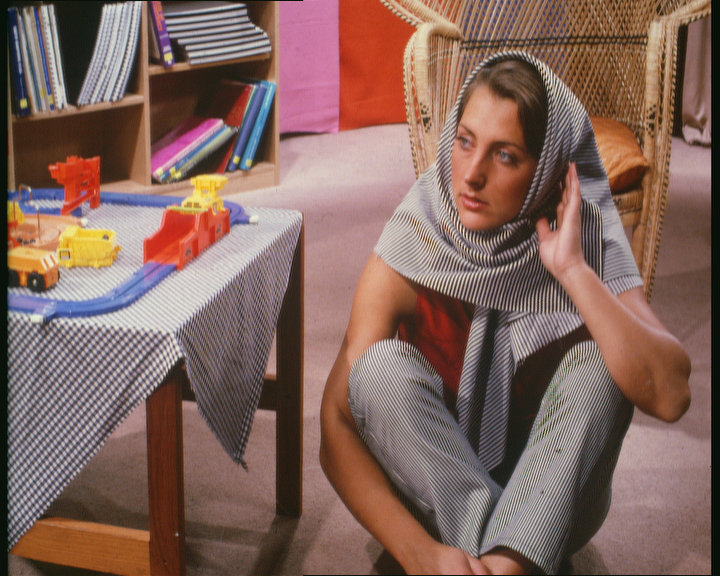

In [11]:
from IPython.display import Image
Image(filename='./data/Set14/barbara.png')

## PSNR

In [14]:
!python test.py --cfg_path="./configs/psnr.yaml" --img_path="./data/Set14/barbara.png"
Image(filename='./Bic_SR_HR_barbara.png')

Output hidden; open in https://colab.research.google.com to view.

## ESRGAN

In [15]:
!python test.py --cfg_path="./configs/esrgan.yaml" --img_path="./data/Set14/barbara.png"
Image(filename='./Bic_SR_HR_barbara.png')

Output hidden; open in https://colab.research.google.com to view.

#Test whole dataset


##PSNR

In [16]:
!python test.py --cfg_path="./configs/psnr.yaml"

2020-11-28 18:37:39.276043: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-28 18:37:39.276170: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-28 18:37:39.276190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
I1128 18:37:40.308888 140500154439552 utils.py:30] Detect 1 Physical GPUs, 1 Logical GPUs.
[*] load ckpt from ./checkpoints/psnr_pretrain/ckpt-501.
[*] Processing on Set5 and Set14, and write results
'set5_pat

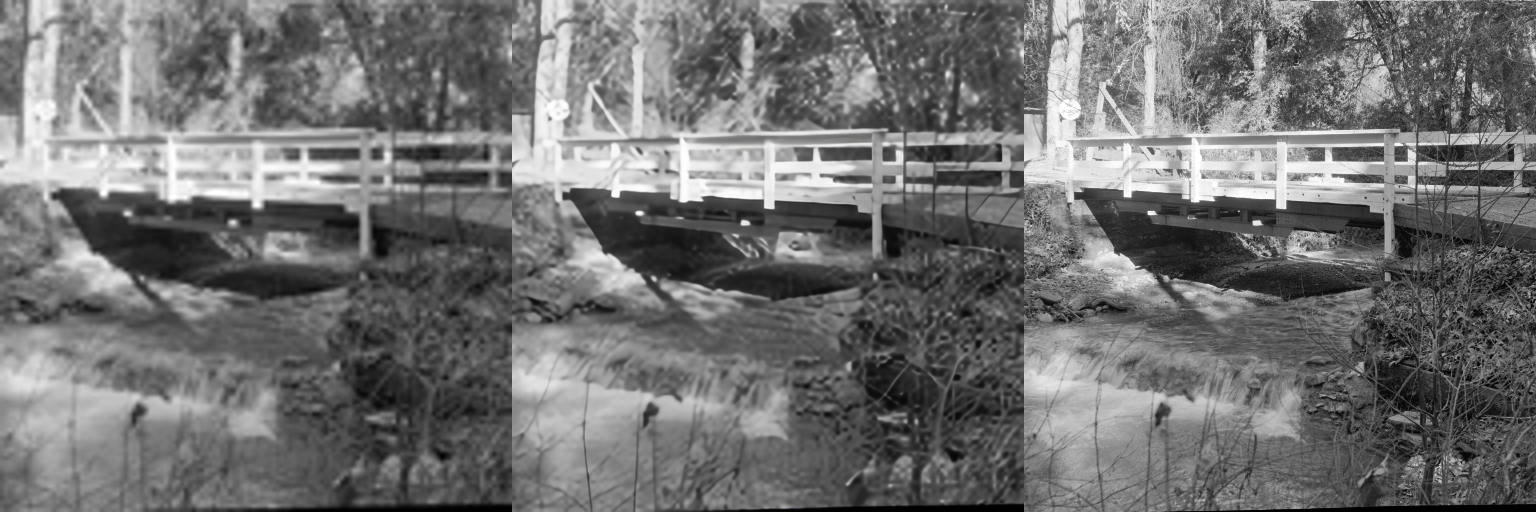

In [17]:
Image(filename='results/psnr_pretrain/set14/Bic_SR_HR_bridge.png')

## ESRGAN

In [18]:
!python test.py --cfg_path="./configs/esrgan.yaml"

2020-11-28 18:39:46.248720: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-28 18:39:46.248828: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-28 18:39:46.248853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
I1128 18:39:47.246120 139881218189184 utils.py:30] Detect 1 Physical GPUs, 1 Logical GPUs.
[*] load ckpt from ./checkpoints/esrgan/ckpt-581.
[*] Processing on Set5 and Set14, and write results
'set5_path' form

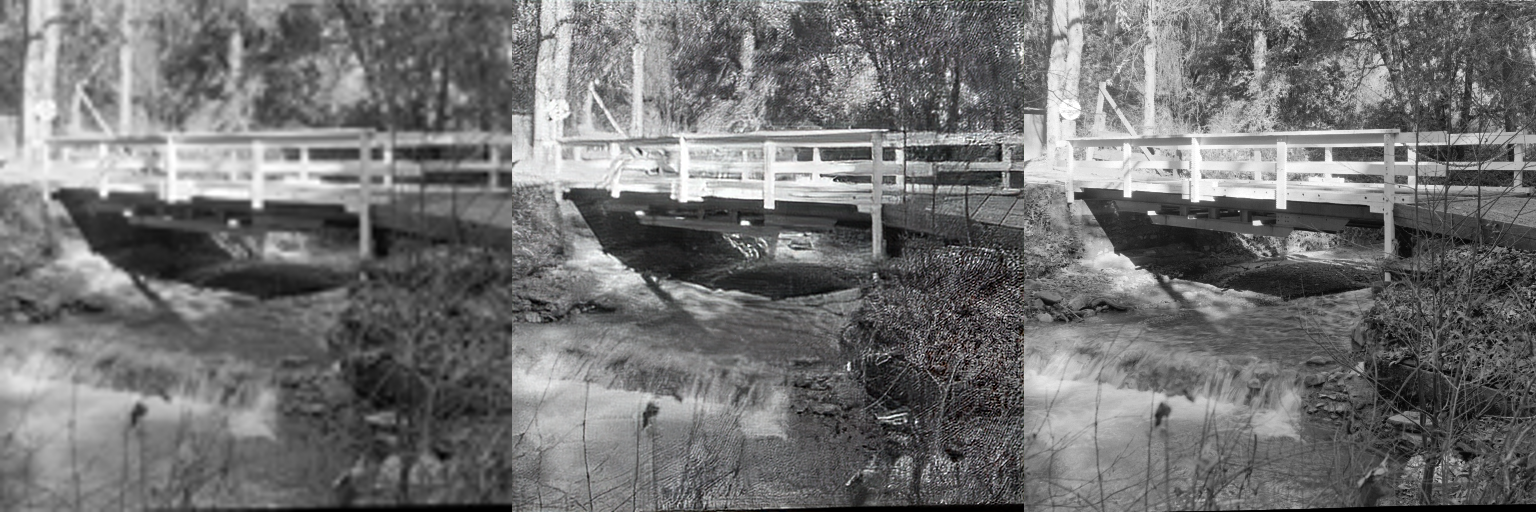

In [19]:
Image(filename='results/esrgan/set14/Bic_SR_HR_bridge.png')